In [1]:
import jax
import jax.numpy as jnp

from optimizers import SGD
from test_opts import MLP

import matplotlib.pyplot as plt


In [2]:
KEY = jax.random.PRNGKey(42)

In [3]:
XDIM = 128
BS = 256

true_A = jax.random.uniform(KEY, (XDIM, 1))

def generate_batch(batch_size=BS, key: jax.random.PRNGKey=KEY) -> tuple[jnp.ndarray, jnp.ndarray]:
    x = jax.random.uniform(key, (batch_size, XDIM), minval=0, maxval=3)
    y = jnp.dot(x, true_A) + jax.random.normal(key, (batch_size, 1))*0.01
    return x, y

In [4]:
model = MLP()
x0, _ = generate_batch(BS)
variables = model.init(KEY, x0)

def loss_fn(variables, batch: tuple[jnp.ndarray, jnp.ndarray], train: bool = True) -> jnp.ndarray:
    x, y = batch
    logits = model.apply(variables, x)
    return jnp.mean((logits - y) ** 2), {}

opt = SGD(lr=1e-5, loss_fn=loss_fn, bs=BS)
state =opt.init(variables)

In [5]:
%%time
losses = []

for step in range(20_000):
	train_key, KEY = jax.random.split(KEY)
	batch = generate_batch(BS, train_key)
	loss, state = opt.update(state, batch)
	if step % 100 == 0 or step == 499:
		losses.append(loss)
		print(f"Step {step} | Loss: {loss:.4f}")

Step 0 | Loss: 9731.4961
Step 100 | Loss: 17.4083
Step 200 | Loss: 13.2847
Step 300 | Loss: 14.7276
Step 400 | Loss: 12.5477
Step 499 | Loss: 10.5139
Step 500 | Loss: 12.9076
Step 600 | Loss: 11.9682
Step 700 | Loss: 10.6699
Step 800 | Loss: 11.7378
Step 900 | Loss: 10.5600
Step 1000 | Loss: 8.6733
Step 1100 | Loss: 7.6996
Step 1200 | Loss: 6.5770
Step 1300 | Loss: 7.3297
Step 1400 | Loss: 5.4491
Step 1500 | Loss: 6.5307
Step 1600 | Loss: 6.6463
Step 1700 | Loss: 5.5747
Step 1800 | Loss: 4.6180
Step 1900 | Loss: 5.0443
Step 2000 | Loss: 4.4707
Step 2100 | Loss: 4.5855
Step 2200 | Loss: 4.0886
Step 2300 | Loss: 3.4814
Step 2400 | Loss: 4.2954
Step 2500 | Loss: 3.5235
Step 2600 | Loss: 3.1237
Step 2700 | Loss: 2.9037
Step 2800 | Loss: 2.7097
Step 2900 | Loss: 2.4445
Step 3000 | Loss: 2.6034


KeyboardInterrupt: 

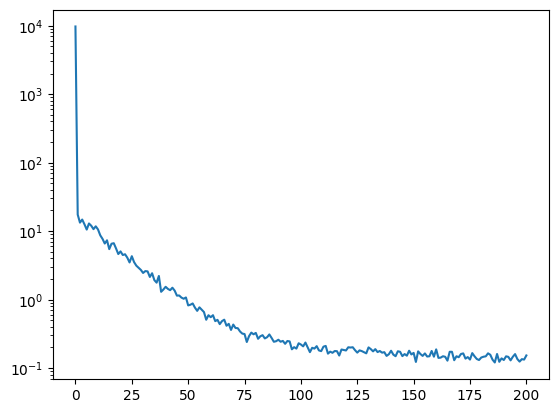

In [7]:
plt.plot(losses)
plt.yscale('log')